FunctionWithGui
===============

 `FunctionWithGui` is one of the core classes of FiatLight: it wraps a function with a GUI that presents its
 inputs and its output(s).

 See its full code [online](../fiat_core/function_with_gui.py).

Creating a FunctionWithGui object
=================================

 For most functions, fiatlight will automatically create the GUI for the inputs and outputs of your functions.

 ### Automatic creation example:
 The code below will provide a GUI for the function `foo` where the user can enter an integer and a float, and
 it will display the result of the function.

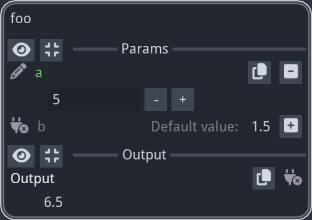

In [6]:
import fiatlight as fl
def foo(a: int, b: float = 1.5) -> float:
    return a + b
# When invoking run, fiatlight will automatically wrap the function into a FunctionWithGui object
fl.run(foo, app_name="Automatic creation")

*Note: fiatlight handles the default values of the parameters, so the user can leave the float parameter empty,
            or click on the "+" button to set it to the default value, and further change it*

 ### Manual creation example
 If you want to create the GUI manually, you can use the `FunctionWithGui` class.
 The previous example can be rewritten as follows:

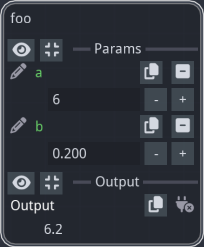

In [7]:
import fiatlight as fl
def foo(a: int, b: float) -> float:
    return a + b

foo_gui = fl.FunctionWithGui(foo)

# Method 1: directly run the function
# fl.run(foo_gui)

# Method 2: create a graph and run it
graph = fl.FunctionsGraph()
graph.add_function(foo_gui)
fl.run(graph, app_name="Manual creation")

Use registered types
--------------------

If you use registered types, the GUI will be automatically created for the parameters and outputs.
In the example below:
  - `fl.fiat_types.TextPath` is an alias for str, but it is registered to be displayed with a file selection dialog.
  - `matplotlib.figure.Figure` is registered to be displayed as a plot in the GUI

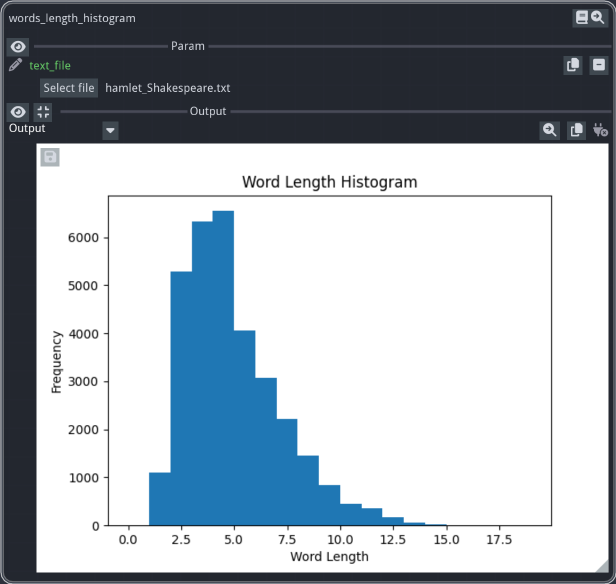

In [8]:
import fiatlight as fl
import matplotlib.figure
import matplotlib.pyplot as plt

def words_length_histogram(text_file: fl.fiat_types.TextPath) -> matplotlib.figure.Figure:
    "Create a histogram of the lengths of words in a text file."
    with open(text_file) as f:
        text = f.read()
    words = text.split()
    lengths = [len(word) for word in words]
    fig, ax = plt.subplots()
    ax.hist(lengths, bins=range(0, 20))
    ax.set_title("Word Length Histogram")
    ax.set_xlabel("Word Length")
    ax.set_ylabel("Frequency")
    return fig


fl.run(words_length_histogram, app_name="Registered types")

Customizing parameters GUI
==========================

 As an example, let's consider the function "my_asin" below: if you run this function with `run()`,
 the GUI will allow the user to enter any float value for x.
 This lets the user enter values that may not be valid for the function.

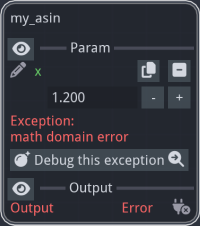

In [9]:
import fiatlight as fl

# Ideally, we would like to restrict the range of x to [-1, 1]
def my_asin(x: float = 0.5) -> float:
    import math
    return math.asin(x)

fl.run(my_asin, app_name="No range restriction")

Customize the range of a numeric parameter
------------------------------------------

It is possible to customize the GUI for parameters using function attributes:
below, we set the range for x. As a consequence it will be displayed with a slider widget
with a range from -1 to 1.

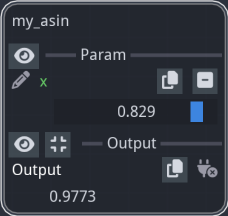

In [10]:
import fiatlight as fl

# Use the `with_fiat_attributes` decorator to set custom attributes for the function:
# Here, we set the range of the x parameter.
# Important: note the double underscore ("_") after the parameter name!
@fl.with_fiat_attributes(x__range=(-1, 1))
def my_asin(x: float = 0.5) -> float:
    import math
    return math.asin(x)

# Note: we could have obtained the same effect with the commented line below:
#    my_asin.x__range = (-1, 1)

fl.run(my_asin, app_name="Range restriction")

Available customization options
-------------------------------

### For int parameters:

In [11]:
%%bash
fiatlight gui int

GUI type: int
  A highly customizable int widget.

  Available custom attributes for IntWithGui:
  --------------------------------------------------------------------------------
  +--------------------+-----------------+-----------+-------------------------------------------+
  | Name               | Type            | Default   | Explanation                               |
  +====================+=================+===========+===========================================+
  | range              | tuple[int, int] | (0, 10)   | Range of the integer                      |
  +--------------------+-----------------+-----------+-------------------------------------------+
  | edit_type          | str             | input     | Type of the edit widget. Possible values: |
  |                    |                 |           | slider, input, drag, knob,                |
  |                    |                 |           | slider_and_minus_plus                     |
  +--------------------+----

### For float parameters:

In [12]:
%%bash
fiatlight gui float

GUI type: float
  A highly customizable float widget.

  Available custom attributes for FloatWithGui:
  --------------------------------------------------------------------------------
  +--------------------+---------------------+-------------+-------------------------------------------+
  | Name               | Type                | Default     | Explanation                               |
  +====================+=====================+=============+===========================================+
  | range              | tuple[float, float] | (0.0, 10.0) | Range of the float                        |
  +--------------------+---------------------+-------------+-------------------------------------------+
  | edit_type          | str                 | input       | Type of the edit widget. Possible values: |
  |                    |                     |             | slider, input, drag, knob,                |
  |                    |                     |             | slider_float_any_r

### For bool parameters:

In [13]:
%%bash
fiatlight gui bool

GUI type: bool
  A bool widget. Can use a checkbox or a toggle.

  Available custom attributes for BoolWithGui:
  --------------------------------------------------------------------------------
  +-----------+--------+-----------+-------------------------------------------+
  | Name      | Type   | Default   | Explanation                               |
  +===========+========+===========+===========================================+
  | edit_type | str    | checkbox  | Type of the edit widget. Possible values: |
  |           |        |           | checkbox, toggle                          |
  +-----------+--------+-----------+-------------------------------------------+

  Available custom attributes for AnyDataWithGui Generic attributes:
  --------------------------------------------------------------------------------
  +----------------+--------+---------------------+------------------------------------------------+
  | Name           | Type   | Default             | Explanation  

### For images:

In [14]:
%%bash
fiatlight gui ImageWithGui

GUI type: ImageWithGui
  A highly sophisticated GUI for displaying and analysing images. Zoom/Pan, show channels, show pixel values, sync zoom accross images, etc.

  Available custom attributes for fiat_image.ImageWithGui:
  --------------------------------------------------------------------------------
  +---------------------------------+-----------------+-----------+-----------------------------------------------+
  | Name                            | Type            | Default   | Explanation                                   |
  +=================================+=================+===========+===============================================+
  |                                 |                 |           | **Main attributes for the image viewer**      |
  +---------------------------------+-----------------+-----------+-----------------------------------------------+
  | only_display                    | bool            | False     | Only display the image, no info displayed, no

A full example with custom attributes for function parameters
-------------------------------------------------------------

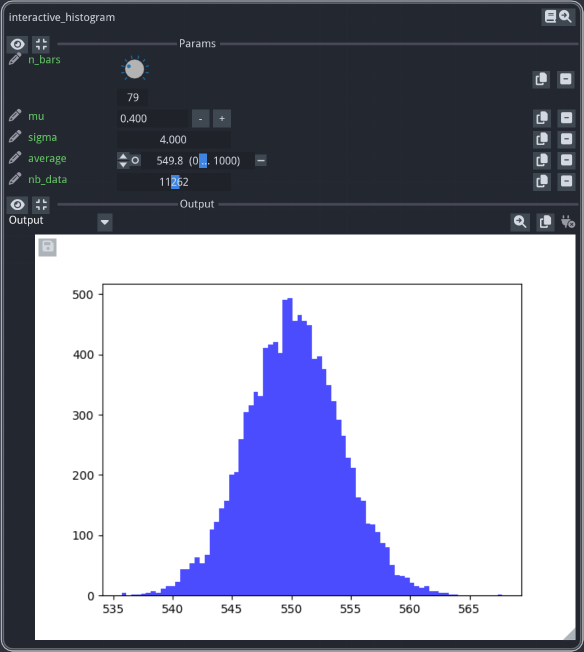

In [17]:
import fiatlight
from matplotlib.figure import Figure

@fiatlight.with_fiat_attributes(
    # Edit the number of bars with a knob
    n_bars__edit_type="knob",
    n_bars__range=(1, 300),
    # Edit the mean with an input field
    mu__edit_type="input",
    mu__range=(-5, 5),
    # Edit the standard deviation with a drag
    sigma__edit_type="drag",
    sigma__range=(0.1, 5),
    # Edit the average with a slider for a float value with any range
    # (the slider range will adapt interactively, when dragging far to the left or to the right)
    average__edit_type="slider_float_any_range",
    # Edit the number of data points with a logarithmic slider
    # Note: by default, you can ctrl+click on a slider to input a value directly,
    #       this is disabled here with nb_data__slider_no_input
    nb_data__edit_type="slider",
    nb_data__range=(100, 1_000_000),
    nb_data__slider_logarithmic=True,
    nb_data__slider_no_input=True,
)
def interactive_histogram(
    n_bars: int = 50, mu: float = 0, sigma: float = 1, average: float = 500, nb_data: int = 4000
) -> Figure:
    '''Generate an interactive histogram with adjustable number of bars, mean, and standard deviation.'''
    import numpy as np
    import matplotlib.pyplot as plt

    data = np.random.normal(mu, sigma, int(nb_data)) + average
    bins = np.linspace(np.min(data), np.max(data), n_bars)
    fig, ax = plt.subplots()
    ax.hist(data, bins=bins, color="blue", alpha=0.7)
    return fig

fiatlight.run(interactive_histogram, app_name="Custom attributes")

Customizing the GUI for a function parameter or output
------------------------------------------------------

You can also customize the GUI for a parameter or output by setting a custom callback function, using
`set_present_callback` or `set_edit_callback` on the parameter or output.

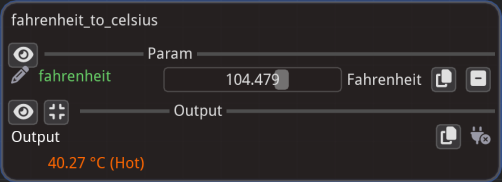

In [19]:
import fiatlight as fl


def fahrenheit_to_celsius(fahrenheit: float = 0) -> float:
    return (fahrenheit - 32) * 5 / 9

# This will be our edit callback: it accepts a float and returns a tuple (bool, float)
# where the first element is True if the value has changed, and the second element is the new value
def edit_temperature(fahrenheit: float) -> tuple[bool, float]:
    from imgui_bundle import imgui, hello_imgui

    # Set the width of the slider field to 10 em units (using em units is a good practice to make the GUI dpi aware)
    imgui.set_next_item_width(hello_imgui.em_size(10))
    changed, new_value = imgui.slider_float("Fahrenheit", fahrenheit, -100, 200)
    return changed, new_value

# This will be our present callback: it accepts a float and returns None
def present_temperature(celsius: float) -> None:
    from imgui_bundle import imgui, ImVec4

    note = "Cold" if celsius < 20 else "Hot" if celsius > 40 else "Warm"
    color = ImVec4(0, 0.4, 1, 1) if celsius < 20 else ImVec4(1, 0.4, 0, 1) if celsius > 40 else ImVec4(0, 1, 0, 1)
    imgui.text_colored(color, f"{celsius:.2f} °C ({note})")


fahrenheit_to_celsius_gui = fl.FunctionWithGui(fahrenheit_to_celsius)
fahrenheit_to_celsius_gui.output(0).set_present_callback(present_temperature)
fahrenheit_to_celsius_gui.input("fahrenheit").set_edit_callback(edit_temperature)

fl.run(fahrenheit_to_celsius_gui, app_name="Custom callbacks")

Control function behavior
=========================

By default, the function will be called only when one of its inputs has changed (either because the user
entered a new value, or because an input is connected to another function that has changed).

You can control the behavior of the function by setting attributes on the function object.

* `invoke_async`: if True, the function will be called asynchronously
* `invoke_manually`: if True, the function will be called only if the user clicks on the "invoke" button
* `invoke_always_dirty`: if True, the function output will always be considered out of date, and
    - if "invoke_manually" is True, the "Refresh needed" label will be displayed
    - if "invoke_manually" is False, the function will be called at each frame

Note: a "live" function is thus a function with `invoke_manually=False` and `invoke_always_dirty=True`

**Example: a live function that display a camera image**

*Note:`fiatlight.fiat_kits.fiat_image.ImageU8_3` is a registered type,
synonym of numpy.ndarray with shape (h, w, 3) and dtype uint8.
Fiatlight will display it as an image in the GUI with a sophisticated image widget (you can zoom in/out,
pan, examine pixel values, etc.)*

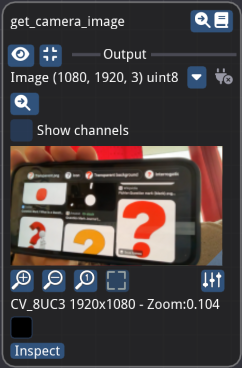

In [21]:
import fiatlight as fl
from fiatlight.fiat_kits.fiat_image import ImageU8_3
import cv2  # we use OpenCV to capture the camera image (pip install opencv-python)
cap = cv2.VideoCapture(0)  # you will need a camera!

def get_camera_image() -> ImageU8_3 | None:
    ret, frame = cap.read()
    return ImageU8_3(frame) if ret else None

# Set flags to make this a live function (called automatically at each frame)
get_camera_image.invoke_always_dirty = True

fl.run(get_camera_image, app_name="Live camera image")

**Example: an async function**

When your function is slow, you can set the `invoke_async` flag to True.
In the image below, the yellow spinner indicates that the function is running,
and the GUI remains responsive.

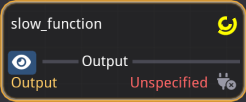

In [16]:
import fiatlight as fl
import time
def slow_function() -> int:
    time.sleep(5)
    return 42

slow_function.invoke_async = True
fl.run(slow_function, app_name="Async function")

**Example: a function that needs to be called manually**

If you set the `invoke_manually` flag to True, the function will be called
only if the user clicks on the "invoke" button (i.e. the button with a "recycle" icon).
If the inputs were changed, a "Refresh needed" label will be displayed.

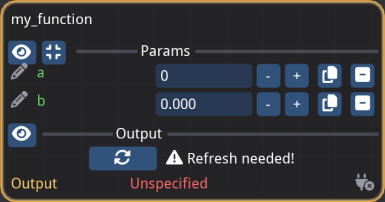

In [17]:
import fiatlight as fl
def my_function(a: int, b: float) -> float:
    return a + b

my_function.invoke_manually = True
fl.run(my_function, app_name="Manual invocation")

Fully customizing a FunctionWithGui object
==========================================

By subclassing `FunctionWithGui`, you can fully customize the behavior of the function:
- you can add a GUI for the internal state of the function (e.g. displaying a live plot of a sound signal)
- you can add a heartbeat function that will be called at each frame (e.g. get the latest data from a sensor)
- you can save and load the internal GUI presentation options to/from a JSON file (e.g. to save the layout of a plot)

**Example: a camera provider with an internal state and saved options**

[fiatlight.fiat_kits.fiat_image.CameraImageProviderGui](https://github.com/pthom/fiatlight/blob/refact_io/src/python/fiatlight/fiat_kits/fiat_image/camera_image_provider.py)
is a good example of a custom FunctionWithGui class.

You can see it in action with the following code:

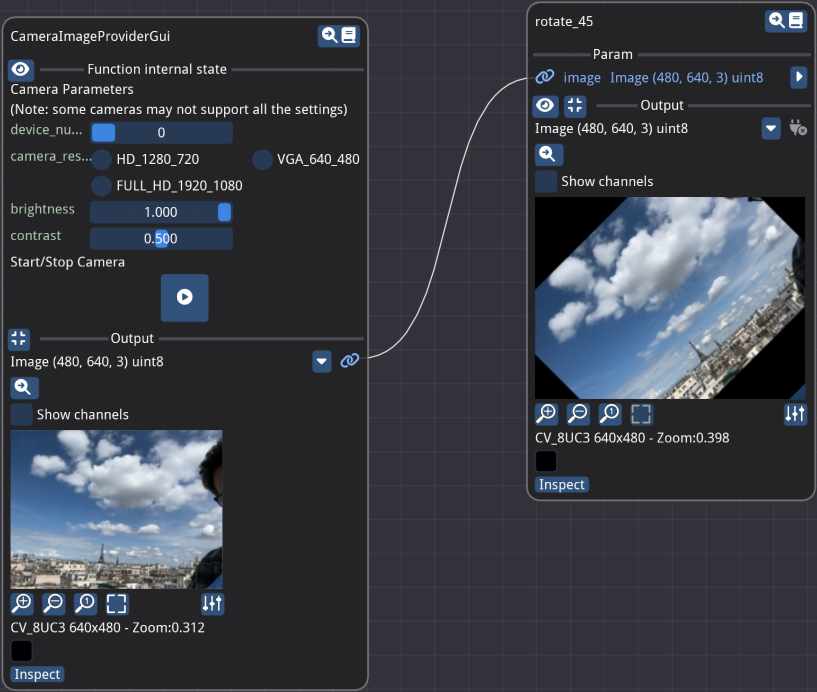

In [24]:
import fiatlight as fl
from fiatlight.fiat_kits.fiat_image import CameraImageProviderGui, ImageU8_3
import cv2

def rotate_45(image: ImageU8_3) -> ImageU8_3:
    transform = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), 45, 1)
    return cv2.warpAffine(image, transform, (image.shape[1], image.shape[0]))  # type: ignore

camera_provider_gui = CameraImageProviderGui()
fl.run([camera_provider_gui, rotate_45], app_name="Camera provider with rotation")

**Commented extracts of [camera_image_provider.py](../fiat_kits/fiat_image/camera_image_provider.py)**

Look at the `CameraImageProviderGui` class that extends `FunctionWithGui`:

In [18]:
from fiatlight.fiat_doc import look_at_code
%look_at_python_code fiatlight.fiat_kits.fiat_image.camera_image_provider.CameraImageProviderGui

class CameraImageProviderGui(FunctionWithGui):
    """A Gui for the camera image provider"""

    _camera_provider: CameraImageProvider
    _camera_params_gui: AnyDataWithGui[CameraParams]

    def __init__(self) -> None:
        super().__init__(self.f, "CameraImageProviderGui")

        from fiatlight.fiat_togui import to_data_with_gui

        self._camera_provider = CameraImageProvider()
        self._camera_params_gui = to_data_with_gui(self._camera_provider.camera_params)
        self._camera_params_gui.label = "Camera Params"

        self.internal_state_gui = self._internal_state_gui
        self.save_internal_gui_options_to_json = self._save_internal_gui_options_to_json
        self.load_internal_gui_options_from_json = self._load_internal_gui_options_from_json

        # A flag for fiatlight to set this as a live function
        self.invoke_always_dirty = True

    def f(self) -> ImageU8_3 | None:
        return self._camera_provider.get_image()

    def _save_internal_gui_options_to_json(self) -> JsonDict:
        r = self._camera_provider.camera_params.model_dump(mode="json")
        return r

    def _load_internal_gui_options_from_json(self, json_dict: JsonDict) -> None:
        camera_params = CameraParams.model_validate(json_dict)
        self._camera_provider.camera_params = camera_params
        self._camera_params_gui.value = camera_params

    def _show_cam_button(self) -> None:
        started = self._camera_provider.started()
        with imgui_ctx.begin_horizontal("CamButton"):
            imgui.spring()
            button_size = hello_imgui.em_to_vec2(3, 3)
            if not started:
                if imgui.button(icons_fontawesome_6.ICON_FA_CIRCLE_PLAY, button_size):
                    self._camera_provider.start()
            else:
                if imgui.button(icons_fontawesome_6.ICON_FA_CIRCLE_STOP, button_size):
                    self._camera_provider.stop()
            imgui.spring()

    def _internal_state_gui(self) -> bool:
        with fontawesome_6_ctx():
            with imgui_ctx.begin_vertical("CamParams"):
                imgui.text_wrapped("(Note: some cameras may not support all the settings)")
                changed = self._camera_params_gui.gui_edit()
                if changed:
                    assert isinstance(self._camera_params_gui.value, CameraParams)
                    self._camera_provider.apply_params(self._camera_params_gui.value)
                imgui.text("Start/Stop Camera")
                self._show_cam_button()

        return False

Note: CameraImageProviderGui uses a `CameraImageProvider` class that provides images from a camera,
      as well `CameraParams`, as a Pydantic model for the camera parameters that will be displayed in the GUI,
      and saved to a JSON file.

We use `base_model_with_gui_registration` decorators to automatically create a GUI for the Pydantic model.

*Notes: `dataclass_with_gui_registration` is also available for dataclasses). A GUI will be created automatically for enums.*

In [19]:
from fiatlight.fiat_togui.to_gui base_model_with_gui_registration
from enum import Enum
from pydantic import BaseModel
import cv2

class CameraResolution(Enum):
    HD_1280_720 = [1280, 720]
    FULL_HD_1920_1080 = [1920, 1080]
    VGA_640_480 = [640, 480]

@base_model_with_gui_registration(device_number__range= (0, 5), brightness__range= (0, 1), contrast__range= (0, 1))
class CameraParams(BaseModel):
    device_number: int = 0
    brightness: float = 0.5
    contrast: float = 0.5
    camera_resolution: CameraResolution = CameraResolution.VGA_640_480


class CameraImageProvider:
    '''A class that provides images from a camera'''
    camera_params: CameraParams
    cv_cap: cv2.VideoCapture | None = None
    ...

Debug function internals
========================

fiatlight provides you with powerful tools to visually debug the intermediate states of your function.

[demos/images/toon_edges.py](../demos/images/toon_edges.py) is a good example of how to use the `fiat_tuning` attribute.

This is a complex function that adds a toon effect to an image, by adding colored edges to the image contours.

Here are some commented extracts of the function:

In [20]:
from fiatlight.fiat_kits.fiat_image import ImageU8_3, ImageU8_1

def add_toon_edges(
image: ImageU8_3,
# ... lots of parameters ...
) -> ImageU8_3:
    edges: ImageU8_1 # = ...             (compute the edges)
    dilated_edges: ImageU8_1 #  = ...    (dilate the edges)
    image_with_edges: ImageU8_3  # = ... (superimpose the edges on the image)

    # fiat_tuning: add debug internals to ease fine-tuning the function inside the node
    from fiatlight.fiat_kits.fiat_image import ImageWithGui

    # Add to fiat_tuning any variable you want to be able to diagnose in the node
    #     * Either a raw type (int, float, str, etc.): see "durations"
    #     * Or a descendant of AnyDataWithGui: see "canny", "dilate", "image_with_edges"
    add_toon_edges.fiat_tuning = {  # type: ignore
        "duration_canny": duration_canny,
        "duration_dilate": duration_dilate,
        "duration_blur": duration_blur,
        "duration_merge": duration_merge,
        "canny": ImageWithGui(edges),
        "dilate": ImageWithGui(dilated_edges),
        "image_with_edges": ImageWithGui(image_with_edges),
    }

    # return the image with edges
    return image_with_edges

Once these internals are set, you can see the function "Internals" in the GUI:

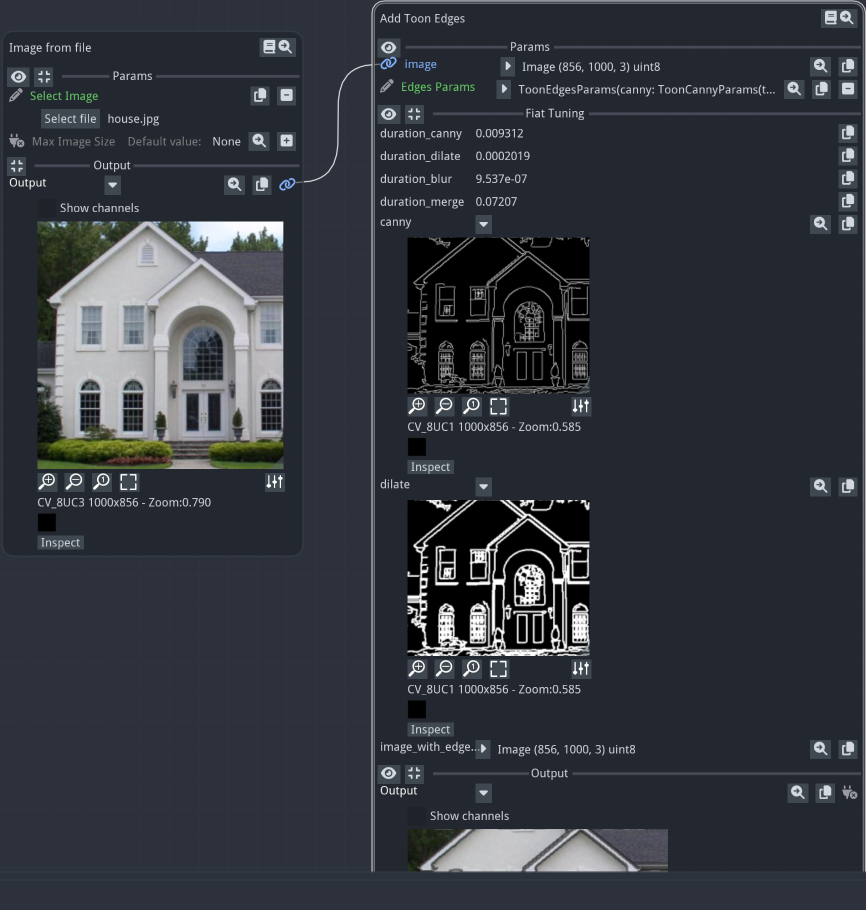

In [22]:
import fiatlight as fl
from fiatlight.fiat_kits.fiat_image import ImageU8_GRAY, ImageU8_3, image_source
from fiatlight.demos.images.toon_edges import add_toon_edges

fl.run([image_source, add_toon_edges], app_name="Toon edges")

-------------------------------------------------------------------------------

FunctionWithGui signature
=========================

Below, you will find the "signature" of the `FunctionWithGui` class,
with its main attributes and methods (but not their bodies)

Its full source code is [available online](https://github.com/pthom/fiatlight/blob/refact_io/src/python/fiatlight/fiat_core/function_with_gui.py).

In [23]:
from fiatlight.fiat_doc import look_at_code
%look_at_class_header fiatlight.fiat_core.FunctionWithGui

class FunctionWithGui:
    """FunctionWithGui: add GUI to a function

    `FunctionWithGui` is one of the core classes of FiatLight: it wraps a function with a GUI that presents its
    inputs and its output(s).

    Public Members
    ==============
    # the name of the function
    name: str = ""

    #
    # Behavioral Flags
    # ----------------
    # invoke_async: if true, the function shall be called asynchronously
    invoke_async: bool = False

    # invoke_manually: if true, the function will be called only if the user clicks on the "invoke" button
    # (if inputs were changed, a "Refresh needed" label will be displayed)
    invoke_manually: bool = False

    # invoke_always_dirty: if true, the function output will always be considered out of date, and
    #   - if invoke_manually is true, the "Refresh needed" label will be displayed
    #   - if invoke_manually is false, the function will be called at each frame
    # Note: a "live" function is thus a function with invoke_manually=False and invoke_always_dirty=True
    invoke_always_dirty: bool = False

    # Optional user documentation to be displayed in the GUI
    #     - doc_display: if True, the doc string is displayed in the GUI (default: False)
    #     - doc_is_markdown: if True, the doc string is in Markdown format (default: True)
    #     - doc_user: the documentation string. If not provided, the function docstring will be used
    #     - doc_show_source: if True, the source code of the function will be displayed in the GUI
    doc_display: bool = True
    doc_markdown: bool = True
    doc_user: str = ""
    doc_show_source: bool = False

    #
    # Internal state GUI
    # ------------------
    # internal_state_gui: optional Gui for the internal state of the function
    # (this function may display a GUI to show the internal state of the function,
    #  and return True if the state has changed, and the function needs to be called)
    internal_state_gui: BoolFunction | None = None

    # internal_state_gui_node_compatible:
    # If True, the internal_state_gui function is incompatible with being presented in a node
    # (this is due to a limitation of the node editor, which cannot render scrollable widgets)
    # Note: instead of setting edit_node_compatible to False, you may query
    #       `fiatlight.is_rendering_in_node()` to know if you are rendering in a node
    #       and choose alternative widgets in this case.
    internal_state_gui_node_compatible: bool = True

    #
    # Heartbeat
    # ---------
    # on_heartbeat: optional function that will be called at each frame
    # (and return True if the function needs to be called to update the output)
    on_heartbeat: BoolFunction | None = None

    #
    # Serialization
    # -------------
    # save/load_internal_gui_options_from_json (Optional)
    # Optional serialization and deserialization of the internal state GUI presentation options
    # (i.e. anything that deals with how the GUI is presented, not the data itself)
    # If provided, these functions will be used to recreate the GUI presentation options when loading a graph,
    # so that the GUI looks the same when the application is restarted.
    save_internal_gui_options_to_json: Callable[[], JsonDict] | None = None
    load_internal_gui_options_from_json: Callable[[JsonDict], None] | None = None

    """
    function_name: str = ''
    function_label: str = ''
    invoke_async: bool = False
    invoke_manually: bool = False
    invoke_always_dirty: bool = False
    doc_display: bool = True
    doc_markdown: bool = True
    doc_user: str = ''
    doc_show_source: bool = False
    internal_state_gui: BoolFunction | None = None
    internal_state_gui_node_compatible: bool = True
    on_heartbeat: BoolFunction | None = None
    save_internal_gui_options_to_json: Callable[[], JsonDict] | None = None
    load_internal_gui_options_from_json: Callable[[JsonDict], None] | None = None
    _dirty: bool = True
    _f_impl: Callable[..

Architecture
============

Below is a PlantUML diagram showing the architecture of the `fiat_core` module.
See the [architecture page](architecture) for the full architecture diagrams.

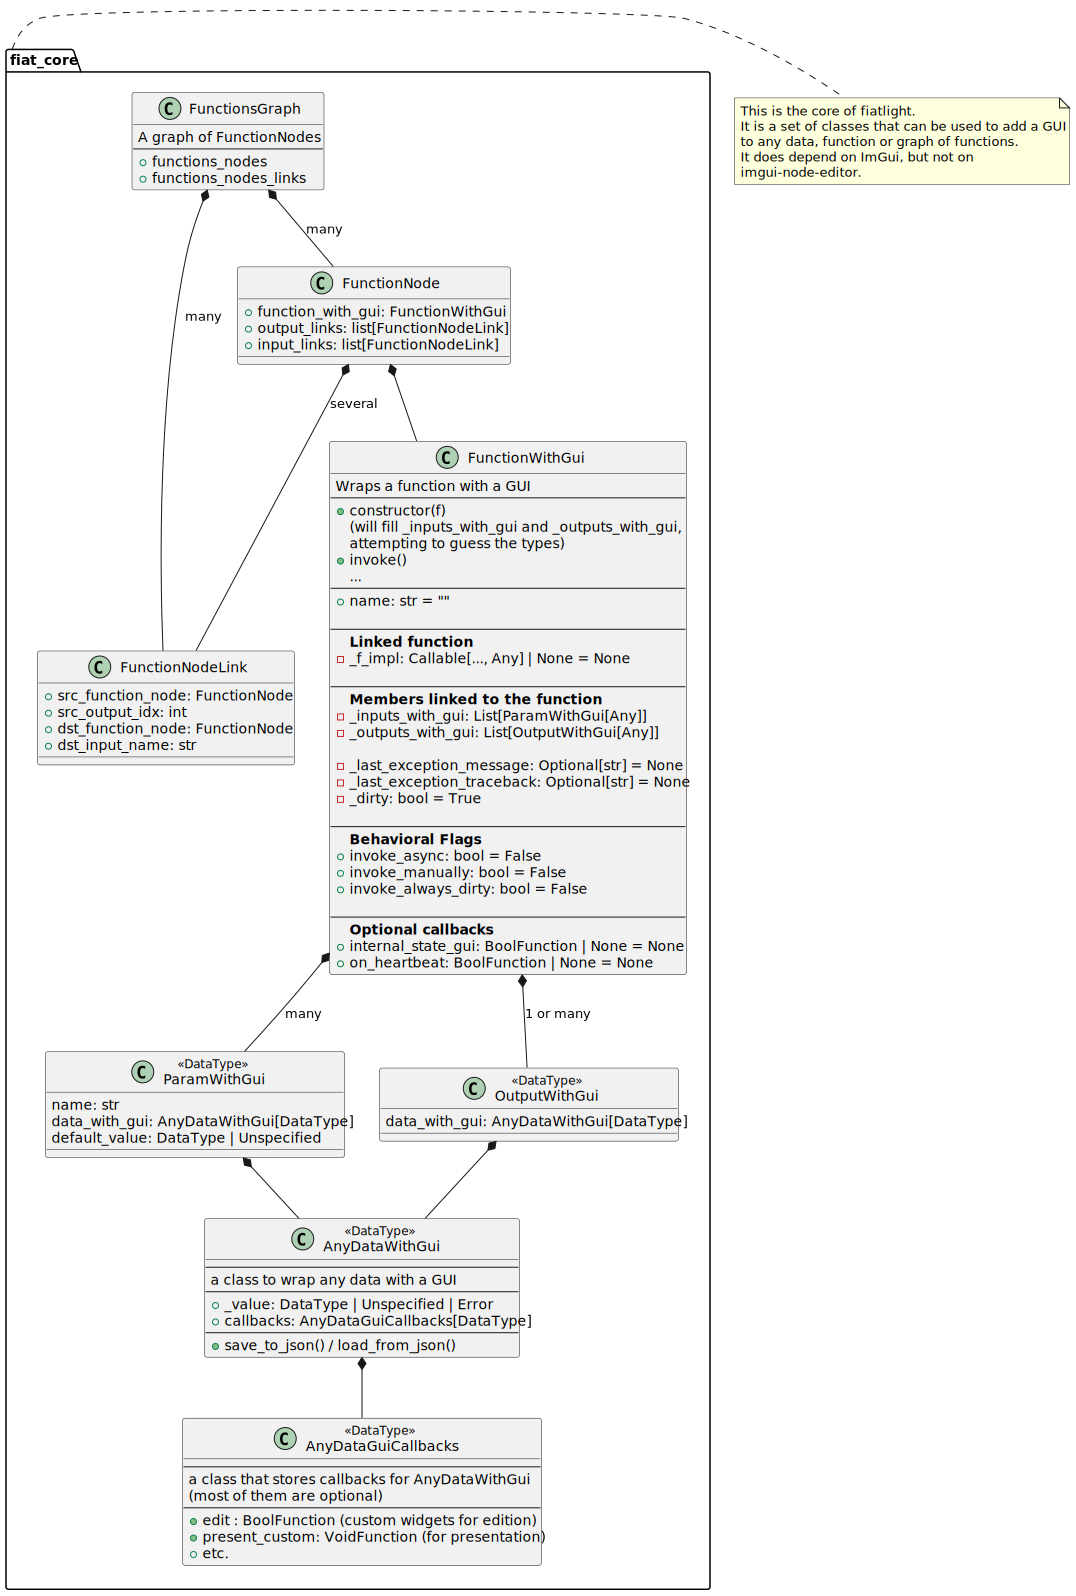

In [24]:
from fiatlight.fiat_doc import plantuml_magic
%plantuml_include class_diagrams/fiat_core.puml